importing modules

In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers, models 
from keras.datasets import mnist 
from keras.datasets import cifar10
import time
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

data manipulation

In [2]:
gpus = tf.config.list_physical_devices('CPU')

if gpus:
    print("Using GPU")
else:
    print("No GPU found, using CPU")

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.mean(axis=3)
x_test = x_test.mean(axis=3)

x_train = x_train.reshape(-1, 32 * 32)
x_test = x_test.reshape(-1, 32 * 32)

data= np.concatenate((x_train, x_test), axis=0)



mean= data.mean(axis=0)
std = data.std(axis=0)


x_train = (x_train - mean) / std
x_test = (x_test - mean) / std






Using GPU


RMSprop optimization

In [9]:
model_1 = models.Sequential(
    [
        layers.Input(shape=(1024)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_1.summary()

model_1.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T1= time.time()
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T2= time.time()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 300)               307500    
                                                                 
 dense_7 (Dense)             (None, 10)                3010      
                                                                 
Total params: 310,510
Trainable params: 310,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
9/9 [==============================] - 1s 59ms/step - loss: 3.7855 - accuracy: 0.2005 - val_loss: 2.8125 - val_accuracy: 0.2444
Epoch 2/500
9/9 [==============================] - 0s 23ms/step - loss: 2.7332 - accuracy: 0.2773 - val_loss: 2.7503 - val_accuracy: 0.2740
Epoch 3/500
9/9 [==============================] - 0s 23ms/step - loss: 2.6549 - accuracy: 0.2966 - val_loss: 2.6519 - val_accuracy: 0.2910
Epoch 4/500
9/9 [=======

evaluating 

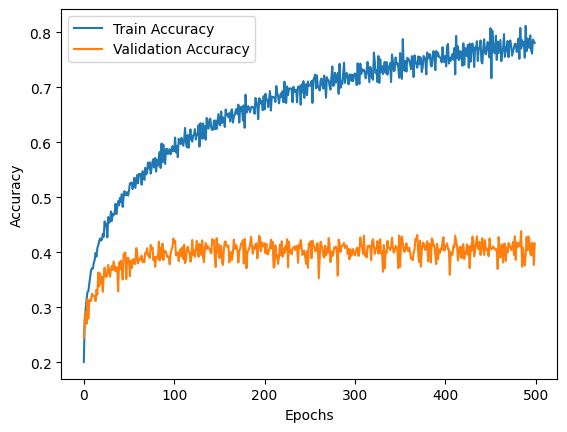

313/313 [==============================] - 1s 4ms/step - loss: 2.4416 - accuracy: 0.4110
Test Loss: 2.441622734069824
Test Accuracy: 0.41100001335144043
Time taken: 93.93502378463745


In [10]:
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_1.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T2-T1}')

Nadam

In [11]:
model_2 = models.Sequential(
    [
        layers.Input(shape=(1024)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_2.summary()

model_2.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T3= time.time()
history_2 = model_2.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T4= time.time()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 300)               307500    
                                                                 
 dense_9 (Dense)             (None, 10)                3010      
                                                                 
Total params: 310,510
Trainable params: 310,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
9/9 [==============================] - 1s 57ms/step - loss: 2.8655 - accuracy: 0.2094 - val_loss: 2.6447 - val_accuracy: 0.2529
Epoch 2/500
9/9 [==============================] - 0s 27ms/step - loss: 2.5405 - accuracy: 0.2953 - val_loss: 2.6017 - val_accuracy: 0.2838
Epoch 3/500
9/9 [==============================] - 0s 22ms/step - loss: 2.4744 - accuracy: 0.3178 - val_loss: 2.4869 - val_accuracy: 0.3023
Epoch 4/500
9/9 [=======

evaluating

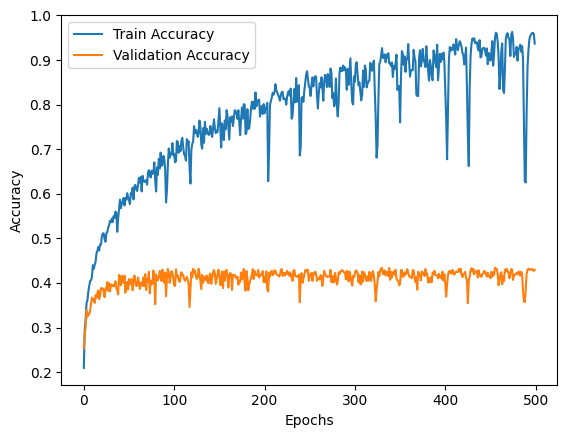

313/313 [==============================] - 1s 4ms/step - loss: 2.4087 - accuracy: 0.4295
Test Loss: 2.4086875915527344
Test Accuracy: 0.429500013589859
Time taken: 100.81818914413452


In [12]:
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_2.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T4-T3}')

NAG

In [13]:
model_3 = models.Sequential(
    [
        layers.Input(shape=(1024)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_3.summary()

model_3.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T5= time.time()
history_3 = model_3.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T6= time.time()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 300)               307500    
                                                                 
 dense_11 (Dense)            (None, 10)                3010      
                                                                 
Total params: 310,510
Trainable params: 310,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
9/9 [==============================] - 1s 84ms/step - loss: 3.3110 - accuracy: 0.1062 - val_loss: 3.1026 - val_accuracy: 0.1253
Epoch 2/500
9/9 [==============================] - 0s 23ms/step - loss: 2.9903 - accuracy: 0.1507 - val_loss: 2.8780 - val_accuracy: 0.1770
Epoch 3/500
9/9 [==============================] - 0s 22ms/step - loss: 2.8172 - accuracy: 0.1920 - val_loss: 2.7719 - val_accuracy: 0.2044
Epoch 4/500
9/9 [=======

evaluating

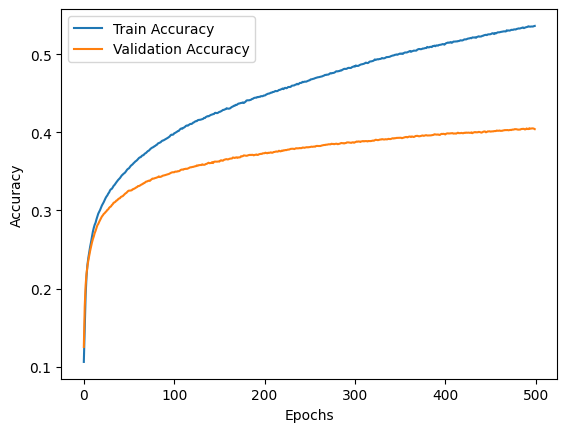

313/313 [==============================] - 1s 4ms/step - loss: 2.1112 - accuracy: 0.4078
Test Loss: 2.111220359802246
Test Accuracy: 0.40779998898506165
Time taken: 91.85072779655457


In [14]:
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_3.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T6-T5}')

SGDR

In [15]:
initial_lr = 0.01
t_0 = 10  # Number of steps for the first cycle
t_mult = 2  # Factor by which t_0 is multiplied after each cycle

lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=initial_lr,
    first_decay_steps=t_0,
    t_mul=t_mult
)

model_4 = models.Sequential(
    [
        layers.Input(shape=(1024)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_4.summary()

model_4.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T7= time.time()
history_4 = model_4.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T8= time.time()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 300)               307500    
                                                                 
 dense_13 (Dense)            (None, 10)                3010      
                                                                 
Total params: 310,510
Trainable params: 310,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
9/9 [==============================] - 1s 47ms/step - loss: 3.1777 - accuracy: 0.1046 - val_loss: 3.0308 - val_accuracy: 0.1292
Epoch 2/500
9/9 [==============================] - 0s 22ms/step - loss: 2.9545 - accuracy: 0.1436 - val_loss: 2.8670 - val_accuracy: 0.1624
Epoch 3/500
9/9 [==============================] - 0s 22ms/step - loss: 2.8352 - accuracy: 0.1720 - val_loss: 2.8266 - val_accuracy: 0.1743
Epoch 4/500
9/9 [=======

evaluating

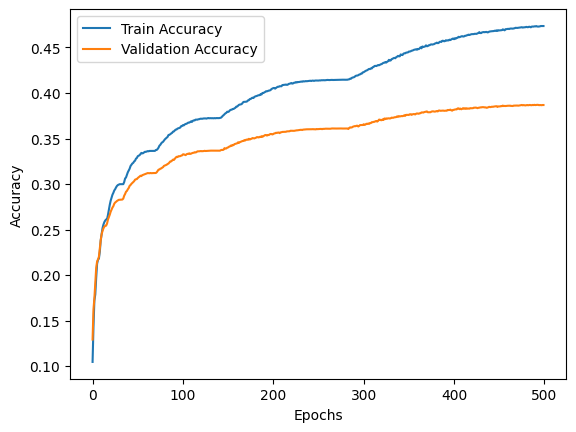

313/313 [==============================] - 1s 4ms/step - loss: 2.1830 - accuracy: 0.3906
Test Loss: 2.1830084323883057
Test Accuracy: 0.3905999958515167
Time taken: 89.6830997467041


In [16]:
plt.plot(history_4.history['accuracy'], label='Train Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_4.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T8-T7}')

Learning Rate Schedulers(Exponential Decay)

In [5]:
initial_lr = 0.01  # Starting learning rate
decay_rate = 0.1   # Factor by which the learning rate decays
decay_steps = 1000 # How often to apply the decay

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=False  # If True, applies decay in discrete intervals (staircase effect)
)

model_5 = models.Sequential(
    [
        layers.Input(shape=(1024)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_5.summary()
model_5.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T9= time.time()
history_5 = model_5.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T10= time.time()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 300)               307500    
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 310,510
Trainable params: 310,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
9/9 [==============================] - 1s 60ms/step - loss: 3.1159 - accuracy: 0.1212 - val_loss: 2.9055 - val_accuracy: 0.1493
Epoch 2/500
9/9 [==============================] - 0s 23ms/step - loss: 2.8376 - accuracy: 0.1702 - val_loss: 2.7945 - val_accuracy: 0.1792
Epoch 3/500
9/9 [==============================] - 0s 24ms/step - loss: 2.7516 - accuracy: 0.1954 - val_loss: 2.7372 - val_accuracy: 0.1962
Epoch 4/500
9/9 [=======

evaluating

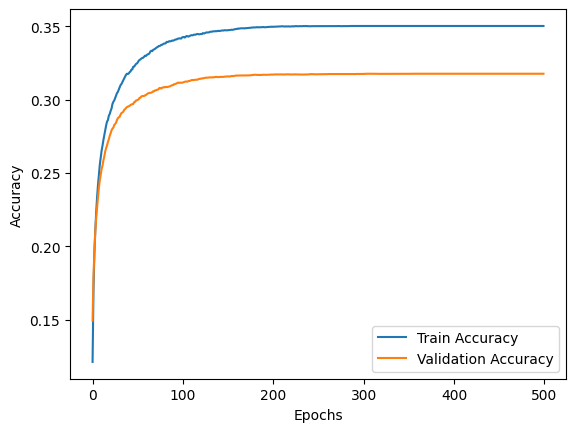

313/313 [==============================] - 1s 4ms/step - loss: 2.3820 - accuracy: 0.3273
Test Loss: 2.3820040225982666
Test Accuracy: 0.3273000121116638
Time taken: 92.14826798439026


In [6]:
plt.plot(history_5.history['accuracy'], label='Train Accuracy')
plt.plot(history_5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_5.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T10-T9}')

Learning Rate Schedulers(Step Decay)

In [17]:
initial_lr = 0.01  # Initial learning rate
decay_steps = [1000, 2000, 3000]  # Step intervals at which the learning rate drops
lr_values = [initial_lr, 0.005, 0.001, 0.0001]  # Learning rates at each interval

# Learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=decay_steps,
    values=lr_values
)

model_6 = models.Sequential(
    [
        layers.Input(shape=(1024)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)
model_6.summary()
model_6.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T11= time.time()
history_6 = model_6.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)
T12= time.time()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 300)               307500    
                                                                 
 dense_15 (Dense)            (None, 10)                3010      
                                                                 
Total params: 310,510
Trainable params: 310,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
9/9 [==============================] - 1s 50ms/step - loss: 3.0573 - accuracy: 0.1396 - val_loss: 2.8573 - val_accuracy: 0.1728
Epoch 2/500
9/9 [==============================] - 0s 21ms/step - loss: 2.8078 - accuracy: 0.1848 - val_loss: 2.7565 - val_accuracy: 0.1994
Epoch 3/500
9/9 [==============================] - 0s 20ms/step - loss: 2.7299 - accuracy: 0.2083 - val_loss: 2.7050 - val_accuracy: 0.2164
Epoch 4/500
9/9 [=======

evaluating

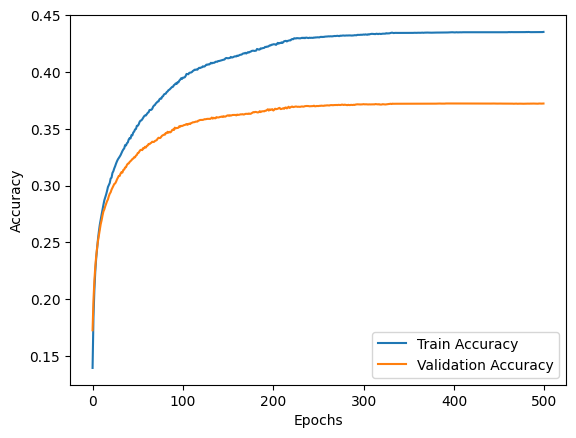

313/313 [==============================] - 1s 4ms/step - loss: 2.2373 - accuracy: 0.3727
Test Loss: 2.2372684478759766
Test Accuracy: 0.3727000057697296
Time taken: 92.44620704650879


In [18]:
plt.plot(history_6.history['accuracy'], label='Train Accuracy')
plt.plot(history_6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_6.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T12-T11}')